### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.2

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [4]:
import itertools

import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
df = df.drop([df.columns[0], df.columns[-1]], axis=1)
print(df)

      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0  -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1  -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2  -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3  -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4   0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564
..       ...       ...  ...       ...  ...       ...      ...    ...       ...
92  2.830268  3.876396   68 -1.386294    1  1.321756        7     60  4.385147
93  3.821004  3.896909   44 -1.386294    1  2.169054        7     40  4.684443
94  2.907447  3.396185   52 -1.386294    1  2.463853        7     10  5.143124
95  2.882564  3.773910   68  1.558145    1  1.558145        7     80  5.477509
96  3.471966  3.974998   68  0.438255    1  2.904165        7     20  5.582932

[97 rows x 9 columns]


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

/opt/python-ensimag/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


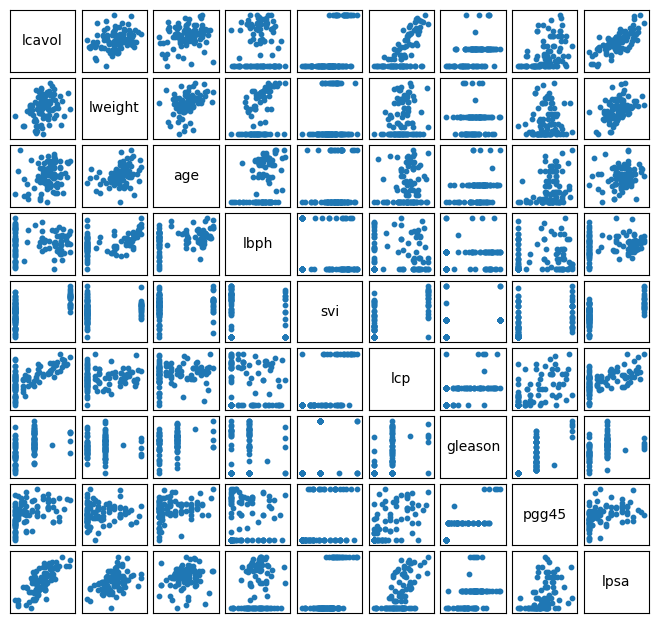

In [5]:
## # import the main plotting library for python
import matplotlib.pyplot as plt
import numpy as np

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    #gets the number of variables
    n_vars = df.shape[1]
    #creates the subplots
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    #sets the sizes of the subplots
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            #for each set of 2 variables
            #get the right plot
            axij = ax[i][j]
            #get the values of each variable
            i_name = df.columns[i]
            j_name = df.columns[j]
            #removes the graduations from the x and y axis
            axij.set_xticks([])
            axij.set_yticks([])
            #sets the border width of each plot
            axij.margins(0.1)
            if i != j:
                #if the variables are different, plot them
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                #when both variables are the same, show the name of the variable 
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

- The most correlated variable to lcavol seems to be lpsa.

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

$$
cor(x,y) = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})} {\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \cdot \sum_{i=1}^{n} (y_i - \bar{y})^2 }}
$$

In [6]:
def correl(x, y):
    x_moy = np.mean(x)
    y_moy = np.mean(y)
    sum1 = 0
    sum2 = 0
    sum3 = 0
    for i in range(len(x)):
        sum1 += (x[i] - x_moy)*(y[i] - y_moy)
        sum2 += (x[i] - x_moy)**2
        sum3 += (y[i] - y_moy)**2
    return sum1 / np.sqrt(sum2 * sum3)


corrells = []
for i in range(df.shape[1]):
    ligne = []
    for j in range(df.shape[1]):
        ligne.append(correl(df.iloc[:, i], df.iloc[:, j]))
    corrells.append(ligne)

res_correl = pd.DataFrame(corrells)
print(res_correl.to_string(index=False))
print("\n",df.corr())

       0        1        2         3         4         5        6        7        8
1.000000 0.280521 0.225000  0.027350  0.538845  0.675310 0.432417 0.433652 0.734460
0.280521 1.000000 0.347969  0.442264  0.155385  0.164537 0.056882 0.107354 0.433319
0.225000 0.347969 1.000000  0.350186  0.117658  0.127668 0.268892 0.276112 0.169593
0.027350 0.442264 0.350186  1.000000 -0.085843 -0.006999 0.077820 0.078460 0.179809
0.538845 0.155385 0.117658 -0.085843  1.000000  0.673111 0.320412 0.457648 0.566218
0.675310 0.164537 0.127668 -0.006999  0.673111  1.000000 0.514830 0.631528 0.548813
0.432417 0.056882 0.268892  0.077820  0.320412  0.514830 1.000000 0.751905 0.368987
0.433652 0.107354 0.276112  0.078460  0.457648  0.631528 0.751905 1.000000 0.422316
0.734460 0.433319 0.169593  0.179809  0.566218  0.548813 0.368987 0.422316 1.000000

            lcavol   lweight       age      lbph       svi       lcp   gleason  \
lcavol   1.000000  0.280521  0.225000  0.027350  0.538845  0.675310  0.432417

/opt/python-ensimag/lib/python3.12/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


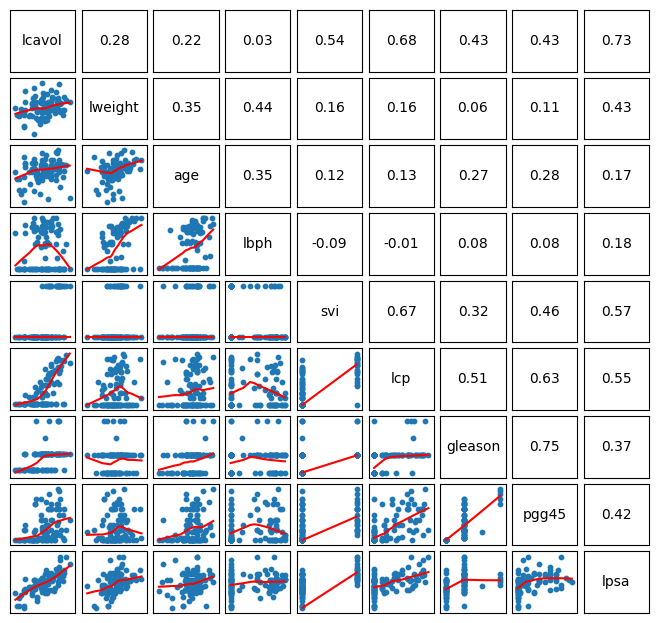

In [7]:
from statsmodels.nonparametric.smoothers_lowess import lowess
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i > j:
                axij.scatter(df[j_name], df[i_name], s=10)
                #Bonus
                smoothed = lowess (df[i_name], df[j_name])
                axij.plot(smoothed[:,0], smoothed[:,1], color = 'red')

            elif i < j :
                r = correl(df[j_name], df[i_name])
                axij.text(0.5, 0.5, f"{r:.2f}", fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()

We can observe that the variables that are strongly correlated are lcavol and lpsa, also gleason and pgg45 .

This indicates potential multicolinearity, which may affect the stability of regression coefficients.

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters.

$$Y_\text{lcavol} = \beta_0 + \beta_1 X_\text{lweight} + \beta_2 X_\text{age} + \beta_3 X_\text{lbph} + \beta_4 X_\text{B\_svi} + \beta_5 X_\text{lcp} + \beta_6 X_\text{B\_gleason7} + \beta_7 X_\text{B\_gleason8} + \beta_9 X_\text{B\_gleason9} +\beta_{10} X_\text{pgg45} + \beta_{11} X_\text{lpsa} + \varepsilon$$

And, for the qualitative variables :]
For svi we will take the baseline as svi$ = 0$ so:
- $X_\text{B\_svi} = 0$ if svi$ = 0$, and  $X_\text{B\_svi} = 1 $if svi$ =1$

for gleason, we will pick gleason$ = 6$ as the base line, so we have:
- $X_\text{B\_gleason7} = 1 $ if gleason $ = 7$, else $X_\text{B\_gleason7} = 0 $
- $X_\text{B\_gleason8} = 1 $ if gleason $ = 8$, else $X_\text{B\_gleason8} = 0 $
- $X_\text{B\_gleason9} = 1 $ if gleason $ = 9$, else $X_\text{B\_gleason9} = 0 $

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

In [8]:
# encode the categorical features with dummy variables
# I specified the columns as by default it wouldn't create the dummy columns, as they are where numerical values.
df_enc = pd.get_dummies(df, columns=['svi', 'gleason'],dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
print(X)

     lweight  age      lbph       lcp  pgg45      lpsa  svi_1  gleason_7  \
0   2.769459   50 -1.386294 -1.386294      0 -0.430783    0.0        0.0   
1   3.319626   58 -1.386294 -1.386294      0 -0.162519    0.0        0.0   
2   2.691243   74 -1.386294 -1.386294     20 -0.162519    0.0        1.0   
3   3.282789   58 -1.386294 -1.386294      0 -0.162519    0.0        0.0   
4   3.432373   62 -1.386294 -1.386294      0  0.371564    0.0        0.0   
..       ...  ...       ...       ...    ...       ...    ...        ...   
92  3.876396   68 -1.386294  1.321756     60  4.385147    1.0        1.0   
93  3.896909   44 -1.386294  2.169054     40  4.684443    1.0        1.0   
94  3.396185   52 -1.386294  2.463853     10  5.143124    1.0        1.0   
95  3.773910   68  1.558145  1.558145     80  5.477509    1.0        1.0   
96  3.974998   68  0.438255  2.904165     20  5.582932    1.0        1.0   

    gleason_8  gleason_9  intercept  
0         0.0        0.0          1  
1         0

- Without fixing dtype=np.float64, the dummies columns would contain bools. We actually need numerical values, as the values of the dummies values of this dataframe represent the values taken by  $X_\text{B\_gleason7}$, $X_\text{B\_gleason8}$, $X_\text{B\_gleason9}$ and $X_\text{B\_svi}$
- We dropped the columns which represent the baseline. Since the baseline isn't in the regression formula, we need to remove it (as we would compute $Y = \beta X$, with $X$ being the matrix with all the values of the previous dataframe, X need to contain only the coefficient present in the regression formula).
- We add a column of ones to have the intercept term $\beta_0$ of the previous formula when we do the regression. Without it, lcavol would be null if all the predictors are null, which is not necessarily the case.

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [9]:
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        18:14:38   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.9

- The regression coefficients for the lines related to svi and gleason are the expected difference in the response between members of the reference category and members of the other category, all else being equal.
- Without the one-hot encoding, we would consider that svi and gleason are continious variables, which is not the case.
- If we consider significative the predictors with a p-value lower than 0.05, we get that : Thr age, lcp, lpsa and pgg45 are significative for this regression. Also, we can remark that none of the dummy predictors is significative.

**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [10]:
print(results.conf_int(0.05))

                  0         1
lweight   -0.431600  0.409107
age        0.002436  0.047129
lbph      -0.219914  0.011515
lcp        0.233639  0.571880
pgg45     -0.018469 -0.000419
lpsa       0.370474  0.728673
svi_1     -0.730029  0.289190
gleason_7 -0.116263  0.739616
gleason_8 -2.219087  0.797911
gleason_9 -0.179004  1.759273
intercept -3.145013  0.331705


**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [11]:
print(results.pvalues)

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64


The p-value if very small (a lot smaller than 0.05), so we confirm that lpsa is a significative predictor. Also, with the confidence interval, we can conclude that if the lpsa increases, lcavol also does.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

In [12]:
from scipy import stats
def evaluate_p_values (X, y) :
    n, p = X.shape
    N = n - p
    XTX = X.T @ X
    XTX_inv = np.linalg.solve (XTX, np.eye(p))
    beta_hat = XTX_inv @ X.T @ y
    res = y - X @ beta_hat
    sigma_squarred = np.sum(res**2) / N
    Var_beta_hat = sigma_squarred * XTX_inv
    se = np.sqrt(np.diag(Var_beta_hat))
    t_test = beta_hat/se
    p_values = 2 * (1 - stats.t.cdf(np.abs(t_test), df = N))
    return beta_hat, p_values

beta_hat, p_values = evaluate_p_values (X.values, y.values)
print("Coef : \n" , beta_hat)
print("p_values : \n", p_values)

Coef : 
 [-0.0112462   0.02478241 -0.10419954  0.40275962 -0.00944383  0.5495731
 -0.22041936  0.31167619 -0.71058822  0.79013455 -1.40665404]
p_values : 
 [9.57707489e-01 3.01499280e-02 7.69560879e-02 8.57785824e-06
 4.04774068e-02 2.93924065e-08 3.92271694e-01 1.51294991e-01
 3.51674448e-01 1.08731299e-01 1.11367559e-01]


numpy.linalg.inv explicitly computes the matrix inverse which is numerically unstable, while numpy.linalg.solve directly solves the linear system and provides better numerical accuracy.

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

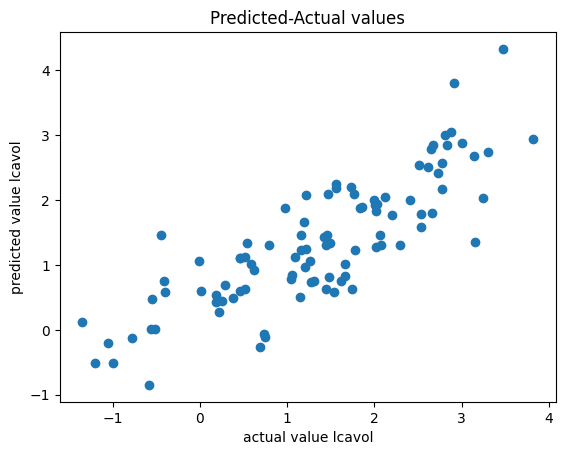

In [13]:
pred = results.get_prediction (X)
y_pred = pred.predicted_mean
plt.scatter(y, y_pred)
plt.xlabel('actual value lcavol')
plt.ylabel('predicted value lcavol')
plt.title ("Predicted-Actual values")
plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

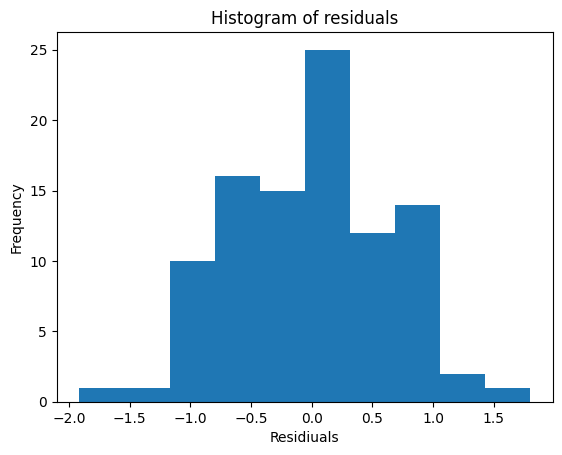

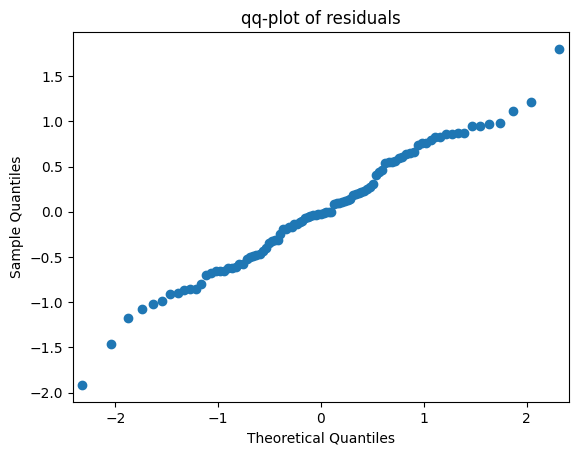

RSS =  41.81406860804535


In [14]:
#Histogram
residuals = results.resid
plt.hist(residuals)
plt.xlabel("Residiuals")
plt.ylabel("Frequency")
plt.title("Histogram of residuals")
plt.show()

#qq-plot
sm.qqplot(residuals)
plt.title("qq-plot of residuals")
plt.show()

#RSS
RSS = np.sum(residuals**2)
print("RSS = ", RSS)

The points in the qq-plot lie approximately along the 45-degree line, indicating that the residuals follow a distributioncclose to the  normal, therefore the normality assumption seems acceptable.

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

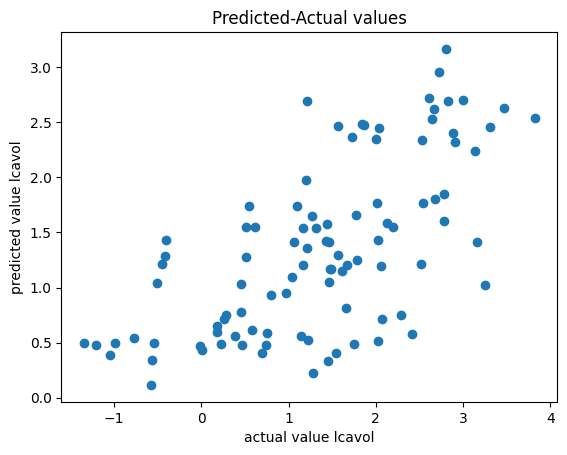

RSS =  75.65323290824037


In [15]:
df_new = df.drop(columns=['lpsa', 'lcp'])
df_new['svi'] = df_new['svi'].astype("category")
df_new['gleason'] = df_new['gleason'].astype("category")

#encode the categorical features with dummy variables
df_enc_new  = pd.get_dummies(df_new, dtype=np.float64)
df_enc_new 
#to drop one dummy column for each predictor
df_enc_new = df_enc_new.drop(columns=['svi_0', 'gleason_6'])
#add a column of ones to the dataframe
df_enc_new['intercept'] = 1
#extract the dataframe for predictors
X_new = df_enc_new.drop(columns=['lcavol'])
#get the observed values to predict
y_new = df_new['lcavol']

model_new = sm.OLS(y_new, X_new)
# now we actually fit the model, e.g. calculate all of regression parameters
results_new = model_new.fit()
results_new.summary()

pred_new = results_new.get_prediction (X_new)
y_pred_new = pred_new.predicted_mean
plt.scatter(y_new, y_pred_new)
#plt.plot ([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('actual value lcavol')
plt.ylabel('predicted value lcavol')
plt.title ("Predicted-Actual values")
plt.show()
residuals_new = results_new.resid
#RSS
RSS_new = np.sum(residuals_new**2)
print("RSS = ", RSS_new)

We can observe that the value of R-squarred decreases (from 0.686 to 0.433) and the value of RSS increases (from 41.81 to 75.65). The model lose a signficant part.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

Question a.
Minimum RSS is 67.67394211176197 for predictors age and lpsa

Question b.
[[np.float64(870.480880596067)], ['lpsa', np.float64(255.21390817101008)], ['age', 'lpsa', np.float64(67.67394211176197)], ['age', 'lcp', 'lpsa', np.float64(50.119972523843586)], ['age', 'lcp', 'lpsa', 'svi_1', np.float64(47.87925252132207)], ['age', 'lbph', 'lcp', 'lpsa', 'svi_1', np.float64(45.58187057256212)], ['age', 'lbph', 'lcp', 'lpsa', 'svi_1', 'gleason_8', np.float64(44.81716331094978)], ['age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_9', np.float64(43.95246278889502)], ['age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'svi_1', 'gleason_7', 'gleason_9', np.float64(42.541247583750604)]]


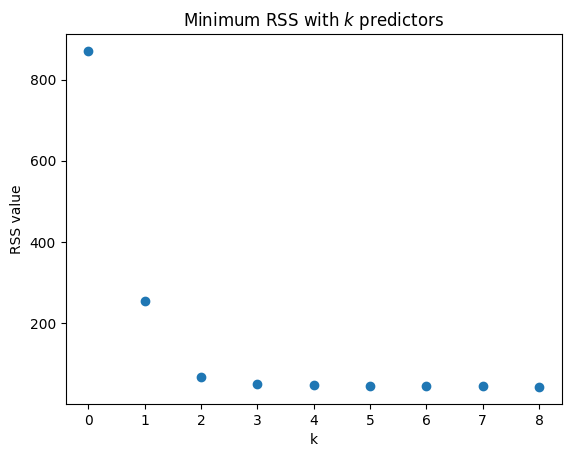

In [16]:
import itertools

#a
print("Question a.")

#The intercept is not part of the k predictors that we will test

predictors = X.columns.drop('intercept')

#Generic RSS
def RSS(predictor_array: list) -> float:
    predictor_coefficient = {};
    #We get the coefficients of the predictors
    for predictor in predictor_array:
        predictor_coefficient[predictor] = results.params[predictor]
    sum = 0
    b0 = results.params["intercept"]
    for i,y_r in enumerate(y):
        #Compute the term i
        current_term = 0
        current_term = y_r - b0
        for predictor in predictor_array:
            current_term -= predictor_coefficient[predictor]*X[predictor][i]
        sum += current_term**2
    return sum


def findMinimizerRSS(k : int, return_all : bool = False) -> list:
    combinationIt = itertools.combinations(predictors,k)
    initComb = list(next(combinationIt))
    RSS_array = [initComb]
    RSS_array[0].append(RSS(initComb))
    minRSS_idx = 0
    minRSS = RSS_array[0][-1]

    #We compute all combination
    for i,combination in enumerate(combinationIt):
        combination = list(combination)
        RSS_array.append(combination)
        RSS_array[-1].append(RSS(combination))

        #If we find a new lowest value, we store it.
        if (RSS_array[-1][-1] < minRSS):
            minRSS = RSS_array[-1][-1]
            minRSS_idx = i+1
    if return_all: return RSS_array[minRSS_idx],RSS_array
    else: return RSS_array[minRSS_idx]


RSS_array_min,RSS_array = findMinimizerRSS(2,True)

print(f"Minimum RSS is {RSS_array_min[-1]} for predictors {RSS_array_min[0]} and {RSS_array_min[1]}")
#Uncomment the following line to print all the results
#for line in RSS_array: print(f"RSS for {line[1]} and {line[2]} is {line[0]}")

#b
print("\nQuestion b.")

k_values = [k for k in range(9)]
append_last_RSS = lambda list_values,all_Minimizer_list : list_values.append(all_Minimizer_list[-1][-1])
arrayMinimizerRSS_values = []
arrayMinimizerRSS = []
for k in k_values:
    arrayMinimizerRSS.append(findMinimizerRSS(k))
    append_last_RSS(arrayMinimizerRSS_values,arrayMinimizerRSS)

print(arrayMinimizerRSS)

best_models = [model[:-1] for model in arrayMinimizerRSS]
plt.scatter(list(range(len(arrayMinimizerRSS_values))),arrayMinimizerRSS_values)
plt.title("Minimum RSS with $k$ predictors")
plt.xlabel("k")
plt.ylabel("RSS value")
plt.show()




Question c.

The RSS will decrease when adding more predictors, so this would suggets that it is better to add all the predictors. However this is not good as it could lead to overfitting and we could also keep a lot of precdictors whioch are not significant. 

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

(a) 
The split-validation is a simple model evaluation technique in which the dataset is divided in two parts : a training set and a test set. The model is fitted using only the tarining data, and its predictive performance is then assessed on the test data, which model has never seen before.

Unlike the RSS criterion used in the item (c) of the previous exercise, split-validation is not biased toward selecting overly complex models. The RSS always decreases when more predictors are added which favors large models and leads to overfitting.


Question b.
[[], ['lpsa'], ['age', 'lpsa'], ['age', 'lcp', 'lpsa'], ['age', 'lcp', 'lpsa', 'svi_1'], ['age', 'lbph', 'lcp', 'lpsa', 'svi_1'], ['age', 'lbph', 'lcp', 'lpsa', 'svi_1', 'gleason_8'], ['age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_9'], ['age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'svi_1', 'gleason_7', 'gleason_9']]


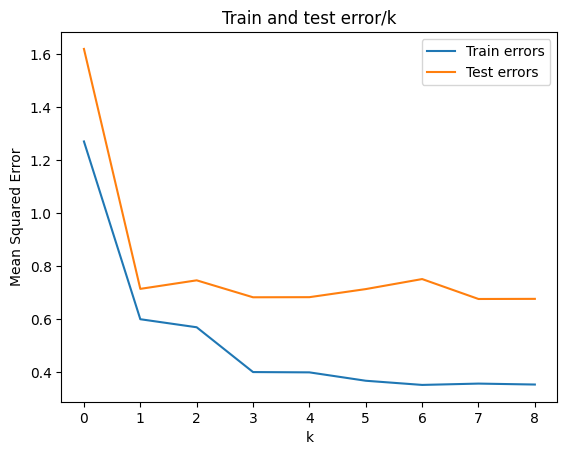

In [20]:
#(b)
print("Question b.")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_used_in_ex3 = X.copy()
df_used_in_ex3['lcavol'] = y
train, test = train_test_split(df_used_in_ex3,test_size=0.3, random_state=0)
train_errors = []
test_errors = []
best_models = [model[:-1] for model in arrayMinimizerRSS]
print(best_models)
for k in range (9) :
    elm = best_models[k]
    df_train = train[list(elm) + ['lcavol']].copy()
    df_test = test[list(elm) + ['lcavol']].copy()
    df_train = pd.get_dummies(df_train, drop_first = True, dtype=np.float64)
    df_test = pd.get_dummies(df_test, drop_first = True, dtype=np.float64)
    df_train['intercept'] = 1
    df_test['intercept'] = 1
    X_train = df_train.drop(columns=['lcavol'])
    y_train = df_train['lcavol']
    X_test = df_test.drop(columns=['lcavol'])
    y_test = df_test['lcavol']
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    pred_train = results.predict(X_train)
    pred_test = results.predict(X_test)
    train_errors.append(mean_squared_error (y_train, pred_train))
    test_errors.append(mean_squared_error (y_test, pred_test))
      
plt.plot(train_errors, label="Train errors")
plt.plot(test_errors, label="Test errors")
plt.xlabel("k")
plt.ylabel("Mean Squared Error")
plt.title("Train and test error/k")
plt.legend()
plt.show()


In [21]:
#(c)
print("Question c.")
idx = np.argmin(test_errors)
best_final = best_models[idx]
print("Best model k value", idx)
print("Selected predictors", best_final)
df_final = df_used_in_ex3[list(best_final) + ['lcavol']]
df_final['intercept'] = 1
X_final = df_final.drop(columns=['lcavol'])
y_final = df_final['lcavol']
model_final = sm.OLS(y_final, X_final)
results = model_final.fit()
print(results.summary())
print("Best model k value", idx)
print("Selected predictors", best_final)


Question c.
Best model k value 7
Selected predictors ['age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_9']
                            OLS Regression Results                            
Dep. Variable:                 lcavol   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     27.21
Date:                Mon, 23 Feb 2026   Prob (F-statistic):           1.33e-19
Time:                        18:15:12   Log-Likelihood:                -97.584
No. Observations:                  97   AIC:                             211.2
Df Residuals:                      89   BIC:                             231.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

Based on the test-error curve obtaine in the previous question, the model with the smallest test error corresponds to k = 7. This means that among all the best-subset models of size k = 0,1,...,8, the 7-predictor model achieves the best predictive performance. This results represents the best compromise between  bias and variance. Smaller data tends to underfit the modeel while larger models overfit and therefore perform worse on the test set.

Question d.


/tmp/ipykernel_80060/3699186465.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


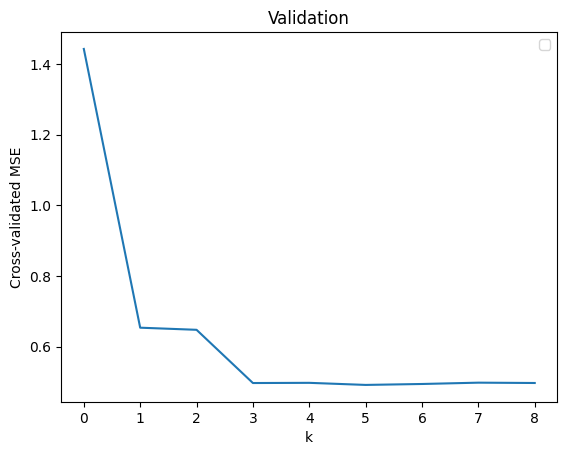

In [22]:
#(d)
print("Question d.")
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=0)
conv_errors = []

for k in range (9) :
    elm = best_models[k]
    errors = []
    for train_idx, test_idx in kf.split(df_used_in_ex3) :
        df_train = df_used_in_ex3.iloc[train_idx].copy()
        df_test = df_used_in_ex3.iloc[test_idx].copy()
        df_train = df_train[list(elm) + ['lcavol']].copy()
        df_test = df_test[list(elm) + ['lcavol']].copy()
        df_train['intercept'] = 1
        df_test['intercept'] = 1
        X_train = df_train.drop(columns=['lcavol'])
        y_train = df_train['lcavol']
        X_test = df_test.drop(columns=['lcavol'])
        y_test = df_test['lcavol']
        model = sm.OLS(y_train, X_train)
        results = model.fit()
        pred_test = results.predict(X_test)
        errors.append (mean_squared_error(y_test, pred_test))
    conv_errors.append (np.mean(errors))
      
plt.plot(conv_errors)
plt.xlabel("k")
plt.ylabel("Cross-validated MSE")
plt.title("Validation")
plt.legend()
plt.show()


To obtain a more stable estimate of predictive performance, we performed 10-fold cross-validation.
The cross-validated error decreases strongly for the first few models indicating that ading predictors significantly improves the model.
After k = 3, the error stabilizes, suggesting that additional variables bring little or not improvement in the predictive performance.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.